Importing libraries and packages


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math


Loading the dataset


In [ ]:
from sklearn.datasets import load_digits
dataset  = load_digits()
X = dataset['data']
Y = dataset['target']

Splitting data into traing and testing datasets using train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

Building the neural network model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

Compiling the model using adam optimizer and sparse categorical cross entropy as loss function

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Training the model

In [ ]:
model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
40/40 [==============================] - 1s 3ms/step - loss: 1.8970 - accuracy: 0.4797
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.8719
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.2584 - accuracy: 0.9189
Epoch 4/20
40/40 [==============================] - 0s 4ms/step - loss: 0.1830 - accuracy: 0.9467
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.1404 - accuracy: 0.9610
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.1100 - accuracy: 0.9666
Epoch 7/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0902 - accuracy: 0.9769
Epoch 8/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0702 - accuracy: 0.9825
Epoch 9/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.9825
Epoch 10/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9897
Epoch 11/20
40/40 [

Retrieving predictions


In [ ]:
Y_pred_keras=model.predict(X_test)


17/17 [==============================] - 0s 2ms/step


Evaluating training loss

In [ ]:
train_loss, train_acc = model.evaluate(X_train, Y_train)

40/40 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 1.0000


Evaluating testing loss

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

17/17 [==============================] - 0s 3ms/step - loss: 0.0876 - accuracy: 0.9722


Retrieving weights and biases for the model


In [ ]:
print("Weights and biases of the layers: \n")
for layer in model.layers:
    print(layer.name, layer)

Weights and biases of the layers: 

dense_6 <keras.layers.core.dense.Dense object at 0x7fe6706d3a60>
dense_7 <keras.layers.core.dense.Dense object at 0x7fe6706d3eb0>
dense_8 <keras.layers.core.dense.Dense object at 0x7fe6706d3d90>


In [ ]:
W1 = model.layers[0].get_weights()[0]
W2 = model.layers[1].get_weights()[0]
W3 = model.layers[2].get_weights()[0]

b1 = model.layers[0].get_weights()[1]
b2 = model.layers[1].get_weights()[1]
b3 = model.layers[2].get_weights()[1]

Defining activation Function


In [ ]:
def relu(A):
  return np.maximum(0,A)

def softmax(A):
  exp_A = np.exp(A)
  return exp_A / exp_A.sum()

Defining forward propogation function

In [ ]:
def forward_propagation(X):
  z1 = np.dot(X , W1) + b1
  A1 = relu(z1)


  Z2 = np.dot(A1 , W2) + b2
  A2 = relu(Z2)


  Z3 = np.dot(A2 , W3) + b3
  A3 = softmax(Z3)
  return A3



Funtion for calculating accuracy

In [ ]:
def accuracy(Y_pred_numpy , Y_actual):
  return np.mean(np.argmax(Y_pred_numpy, axis=1) == Y_actual)

Retrieving predictions

In [ ]:
Y_pred_numpy = forward_propagation(X_test)

acc = accuracy(Y_pred_numpy, Y_test)
print("Accuracy: ", acc)

Accuracy:  0.9722222222222222


Hence, it can be observed that the accuracy obtained on testing dataset is almost same for both the Keras as well as the Numpy model.

Plotting and comapring images between Keras and Numpy models

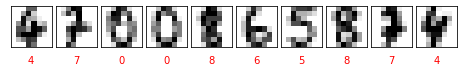

In [ ]:
#Plotting images for keras model
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8,8), cmap='binary', interpolation='nearest')
    ax.set_xlabel(Y_pred_keras[i].argmax(), color='red')
plt.show()

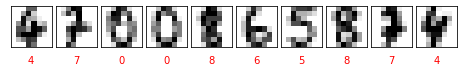

In [ ]:
#Plotting images for numpy model
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8,8), cmap='binary', interpolation='nearest')
    ax.set_xlabel(Y_pred_numpy[i].argmax(), color='red')
plt.show()